# **PREDICTING HOUSE PRICES USING REGRESSION**

## **📥 Downloading and Extracting the Dataset**
Before we start building our house price prediction model, we need to download the dataset from Kaggle and extract its contents.

### **1️⃣ Install Kaggle API**  
The Kaggle API is required to download datasets directly from Kaggle. If you haven't installed it yet, run the command below:  

In [ ]:
%pip install kaggle

### **2️⃣ Download the Dataset**

Use the following command to download the dataset from the Kaggle competition:

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|██████████| 199k/199k [00:00<00:00, 336kB/s]
100%|██████████| 199k/199k [00:00<00:00, 335kB/s]


### **3️⃣ Extract the Dataset**

The dataset is stored as a ZIP file. We need to extract it before using it in our model.

In [ ]:
import zipfile
import os

dataset_zip = "../data/house-prices-advanced-regression-techniques.zip"d
dataset_folder = "../data/raw"

with zipfile.ZipFile(dataset_zip, 'r') as folder:
    folder.extractall(dataset_folder)
    

os.listdir(dataset_folder)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

## 📊 **Loading the Dataset**
Now that we have extracted the dataset, let's load it into Pandas DataFrames for further analysis.

### **1️⃣ Install Pandas**  
Pandas is a powerful library for data manipulation and analysis. If you haven't installed it yet, you can do so using:


In [ ]:
%pip install pandas

In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

### **2️⃣ Load the Dataset into Pandas**

- We will use pd.read_csv() to load both the training and test datasets.
- The .head() function allows us to preview the first five rows of the training dataset. This helps us understand the structure of the data, including the features and target variable.

In [3]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **🔍 Exploratory Data Analysis**

### **1️⃣ Check for missing values**
- Get the amount of missing values in each column.
- Get the percentage of the missing values.

In [6]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(train_df) * 100)
missing_percentage = missing_percentage[missing_percentage > 0]

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_data

,Missing Values,Missing Percentage (%)
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


- Create a bar plot to visualize the percentage of missing data for each feature

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

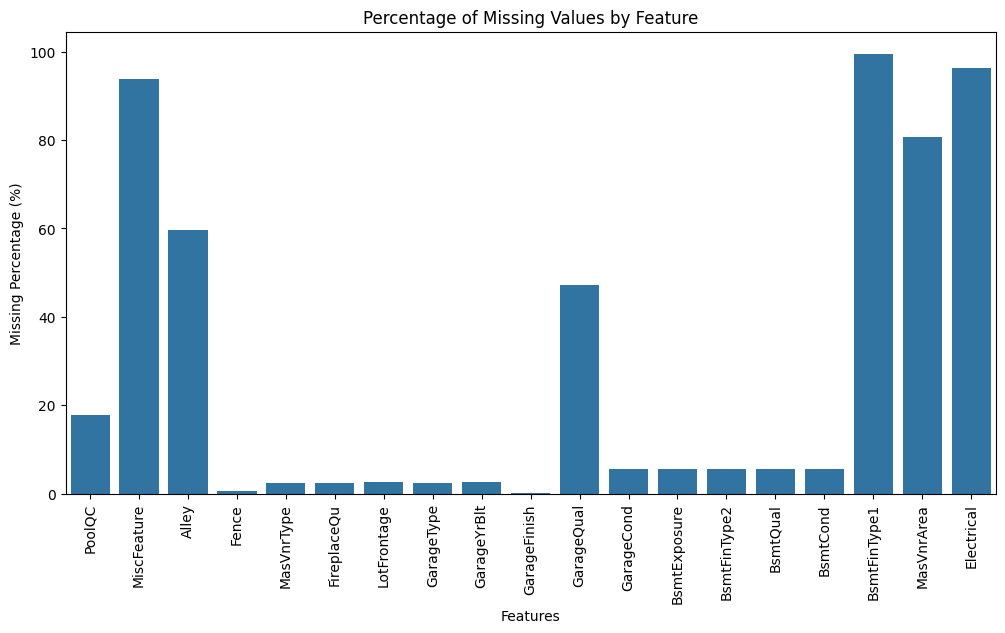

In [8]:
missing_data_sorted = missing_data.sort_values(by="Missing Percentage (%)", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_sorted.index, y=missing_data["Missing Percentage (%)"])

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage (%)")
plt.title("Percentage of Missing Values by Feature")
plt.show()


- Find the relationship of each feature with missing values to SalePrice (dependent variable).

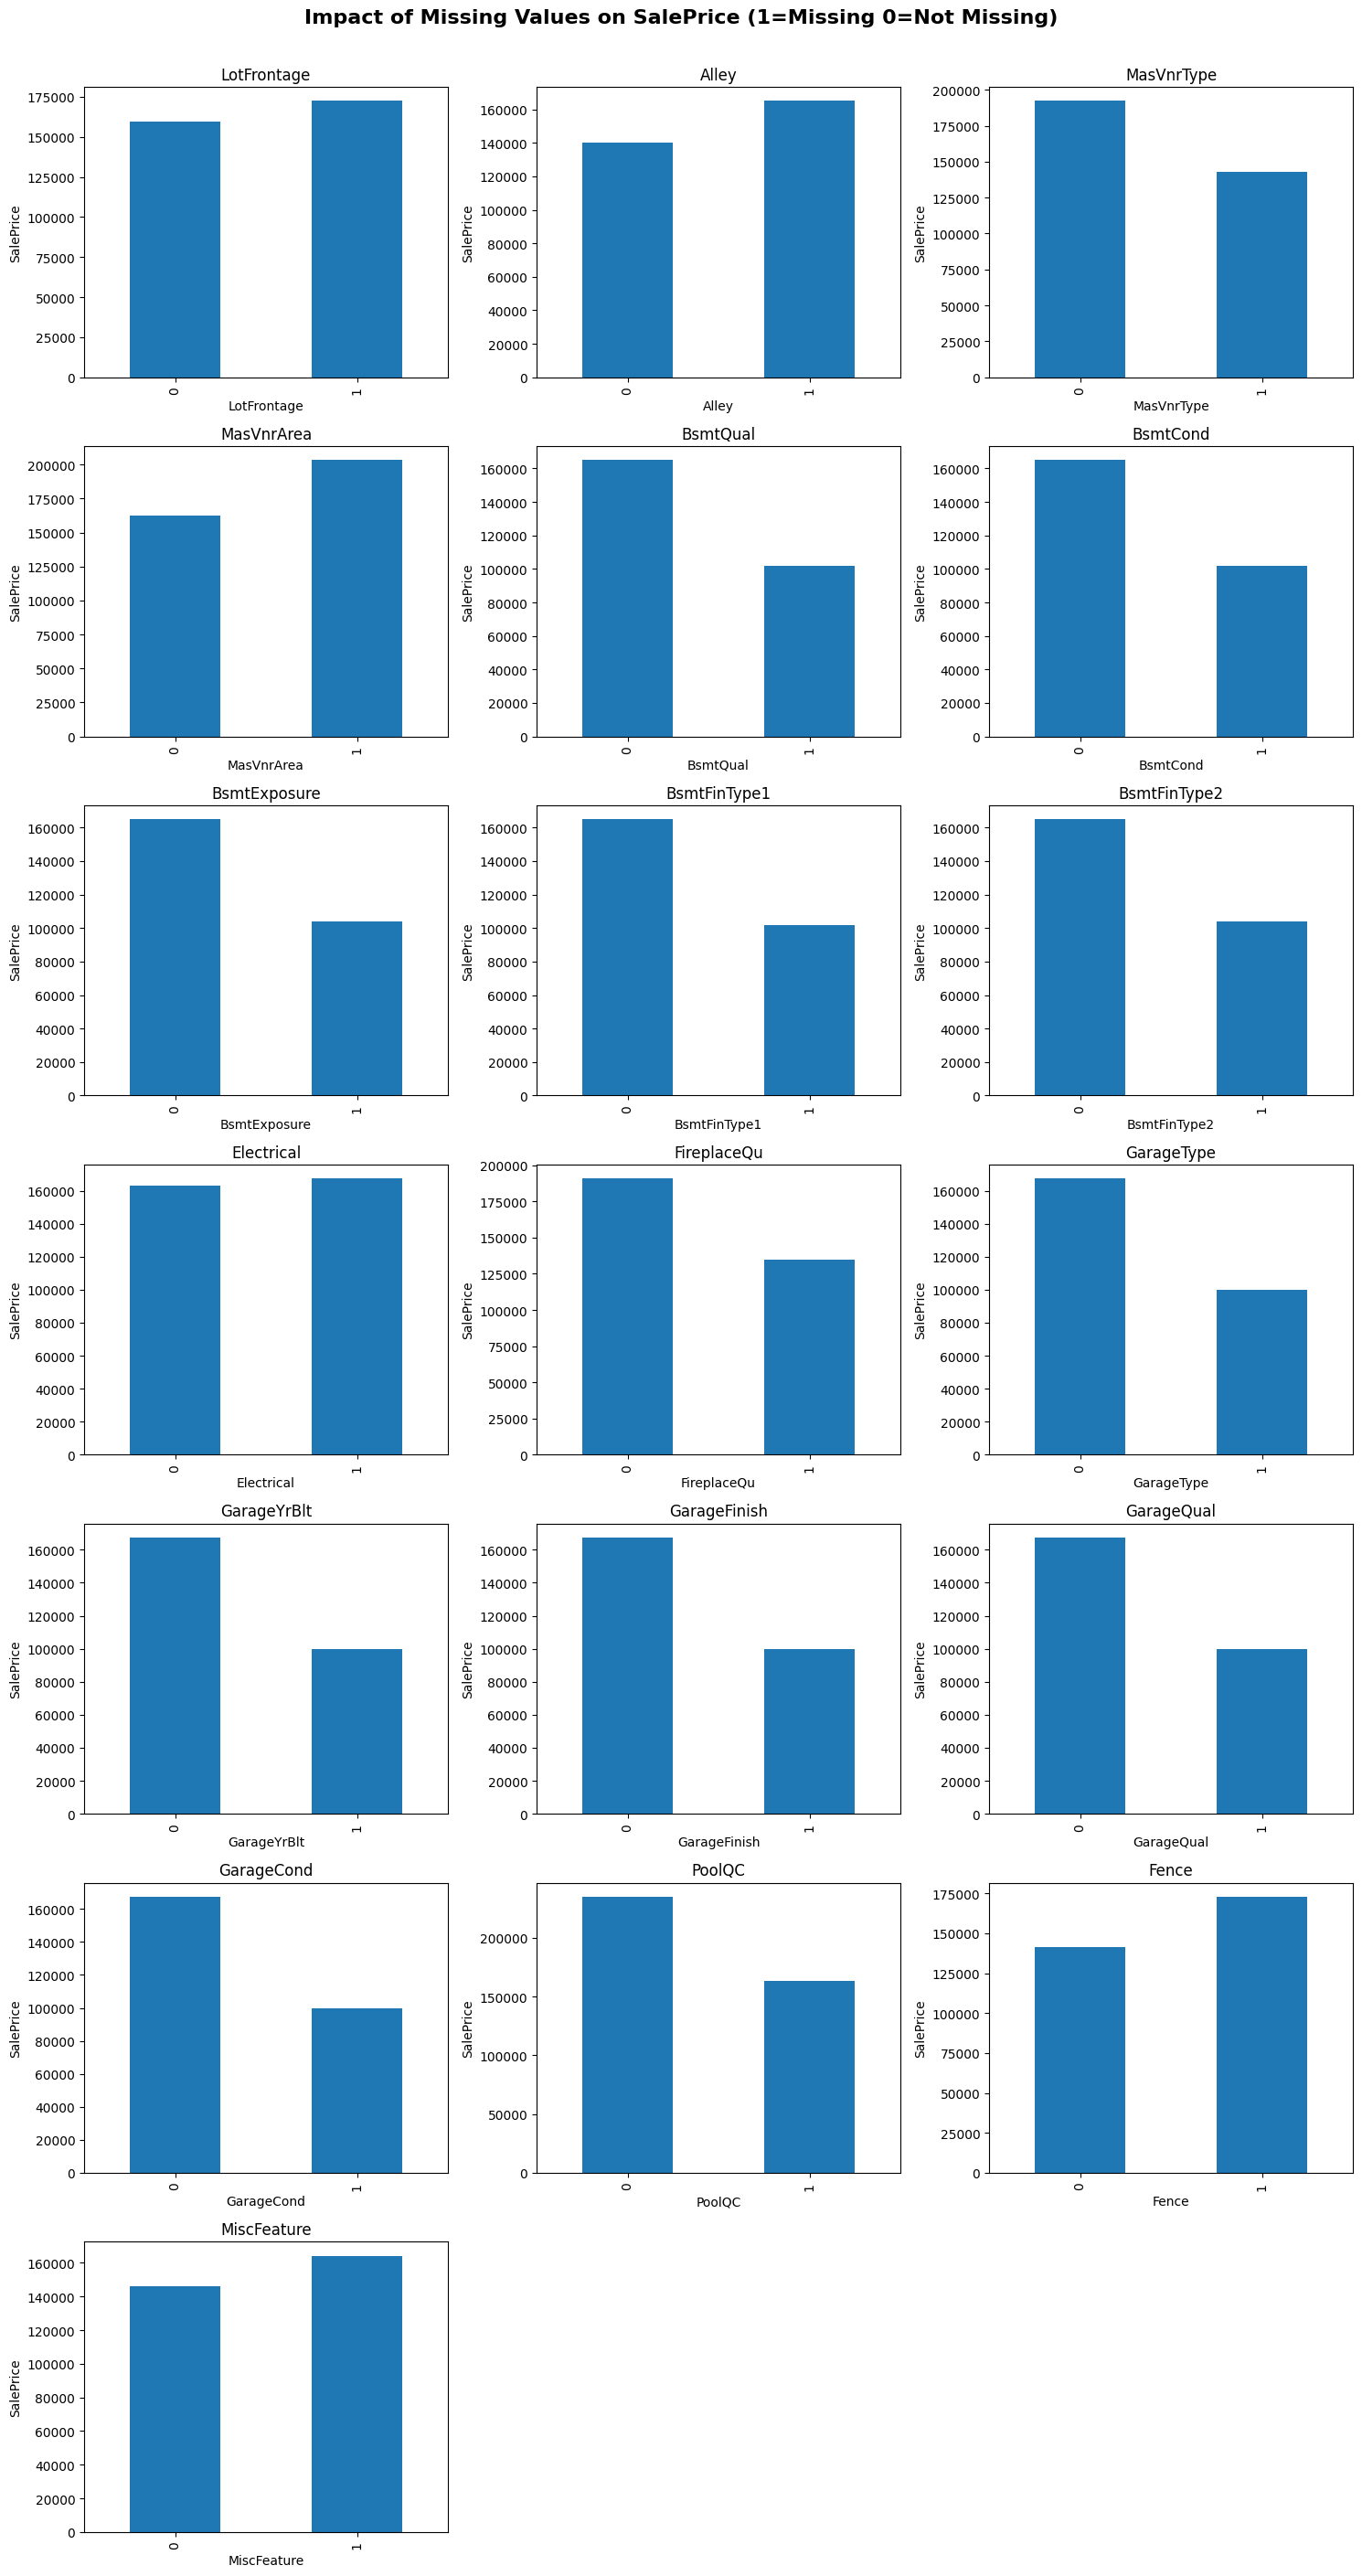

In [9]:
def bar_plot_grid(dataset, missing_vars):
    dataset_index = missing_vars.index
    cols = 3
    rows = -(-len(dataset_index) // cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(15, rows * 4))
    ax = ax.flatten()
    
    for i, feature in enumerate(dataset_index):
        dataset_temp = dataset.copy()
        dataset_temp[feature] = np.where(dataset_temp[feature].isnull(), 1, 0)
        dataset_temp.groupby(feature)['SalePrice'].median().plot.bar(ax=ax[i])
        ax[i].set_title(feature)
        ax[i].set_ylabel("SalePrice")
    
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
        
    plt.suptitle('Impact of Missing Values on SalePrice (1=Missing 0=Not Missing)', fontsize=16, weight='bold', y=1.005)
    plt.tight_layout()
    plt.show()
    
bar_plot_grid(train_df, missing_values)

### **2️⃣ Identify feature types**

In [10]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns

### **📝 To do list:**

**1. Numerical variables**
- find continuous   
    a. check for outliers  
-  check for skewness  
- find discrete  
- find temporal  

**2. Categorical variables**

### **🔢 Numerical Variables**

In [67]:
train_df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### **📅 Temporal Variables (Date/Time)** 

In [15]:
year_vars = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

print(year_vars, '\n')

# check the contents 
for i in year_vars:
    print(i, train_df[i].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 200

In [65]:
train_df[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [20]:
import matplotlib.pyplot as plt

- Left plot visualizes the relationship of YearBuilt, YearRemodAdd and GarageYrBlt with the SalePrice.
- Right plot visualizes the relationship of YrSold with SalePrice.

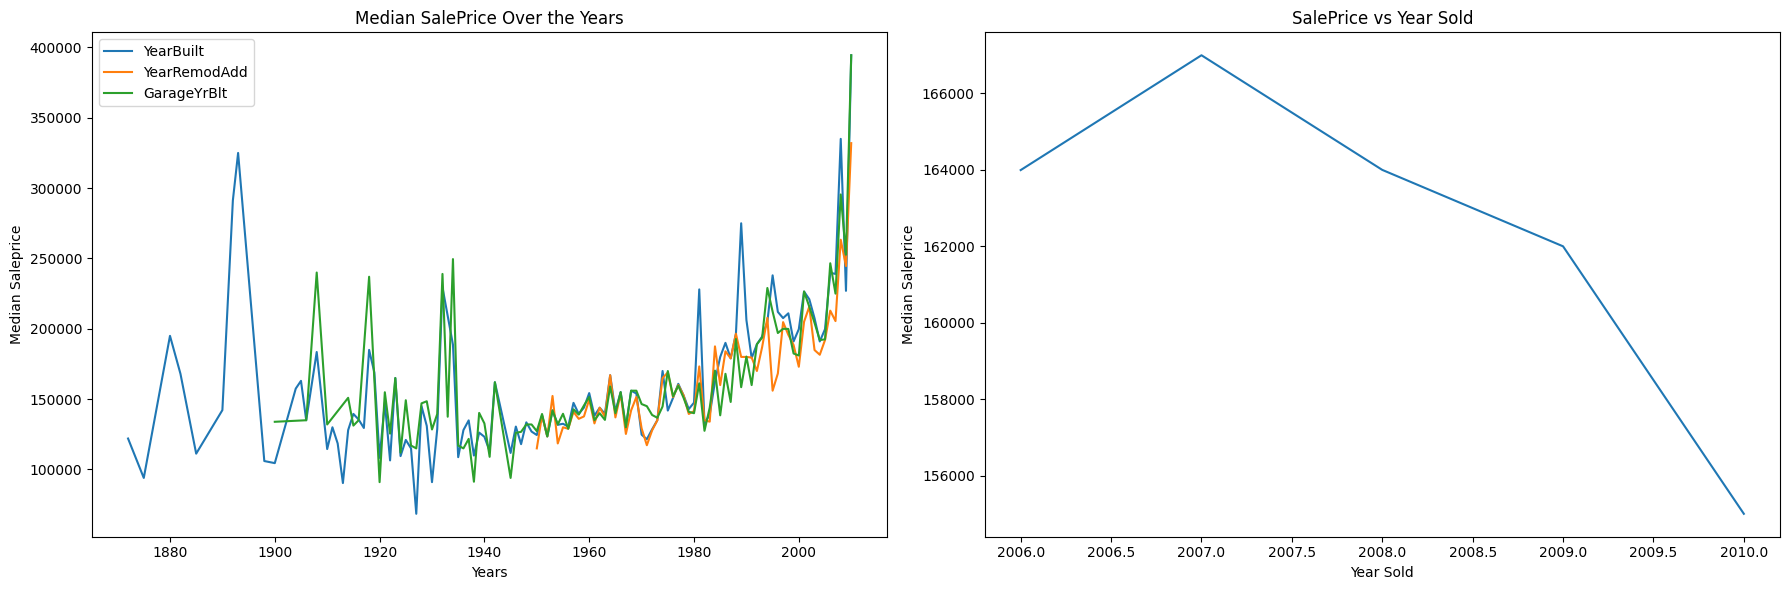

In [41]:
def trends_plot(dataset):
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax = ax.flatten()
    
    for i in year_vars:
        if i != "YrSold":
            dataset.groupby(i)['SalePrice'].median().plot(ax=ax[0], label=i)
    
    ax[0].legend()
    ax[0].set_title("Median SalePrice Over the Years")
    ax[0].set_xlabel("Years")
    ax[0].set_ylabel("Median Saleprice")
    
    dataset.groupby("YrSold")['SalePrice'].median().plot(ax=ax[1])

    ax[1].set_title("SalePrice vs Year Sold")
    ax[1].set_xlabel("Year Sold")
    ax[1].set_ylabel("Median Saleprice")
    
    plt.tight_layout()
    plt.show()
    
trends_plot(train_df)

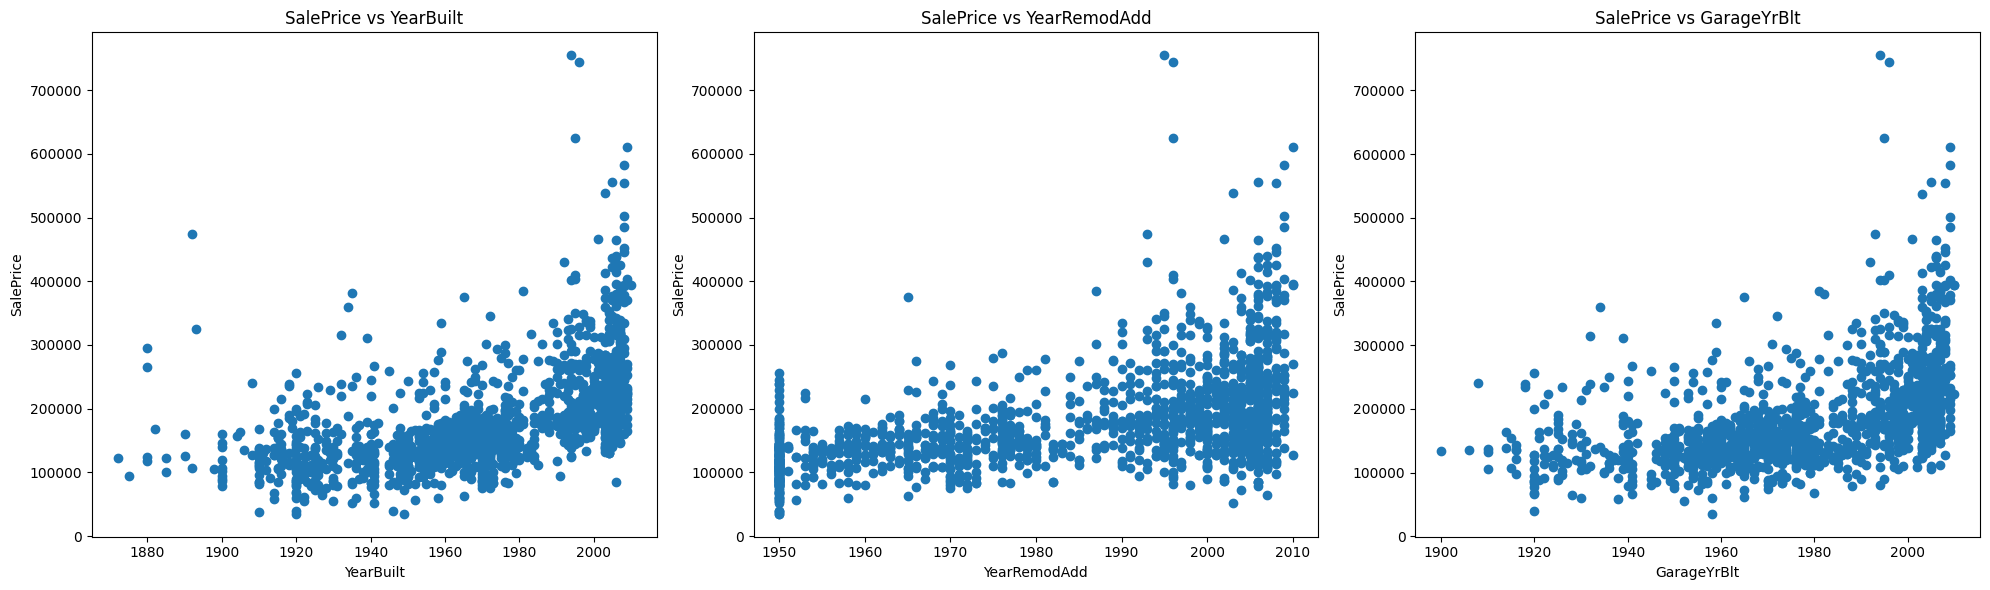

In [ ]:
def scatter_years(dataset):
    fig, ax = plt.subplots(1, 3, figsize=(20,6))
    ax = ax.flatten()
    for i, feature in enumerate(year_vars):
        if feature != "YrSold":
            ax[i].scatter(train_df[feature], dataset['SalePrice'])
            ax[i].set_title(f"SalePrice vs {feature}")
            ax[i].set_xlabel(feature)
            ax[i].set_ylabel("SalePrice")
    
    plt.tight_layout()
    plt.show()
            
scatter_years(train_df)

### **📏 Discrete Variables**

In [59]:
discrete_vars = [ feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in year_vars+['Id'] ]
print(f"Discrete variable count: {len(discrete_vars)}")
print(discrete_vars)

Discrete variable count: 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [68]:
train_df[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


- Check the relationship between each discrete variable and SalePrice

In [52]:
import matplotlib.pyplot as plt

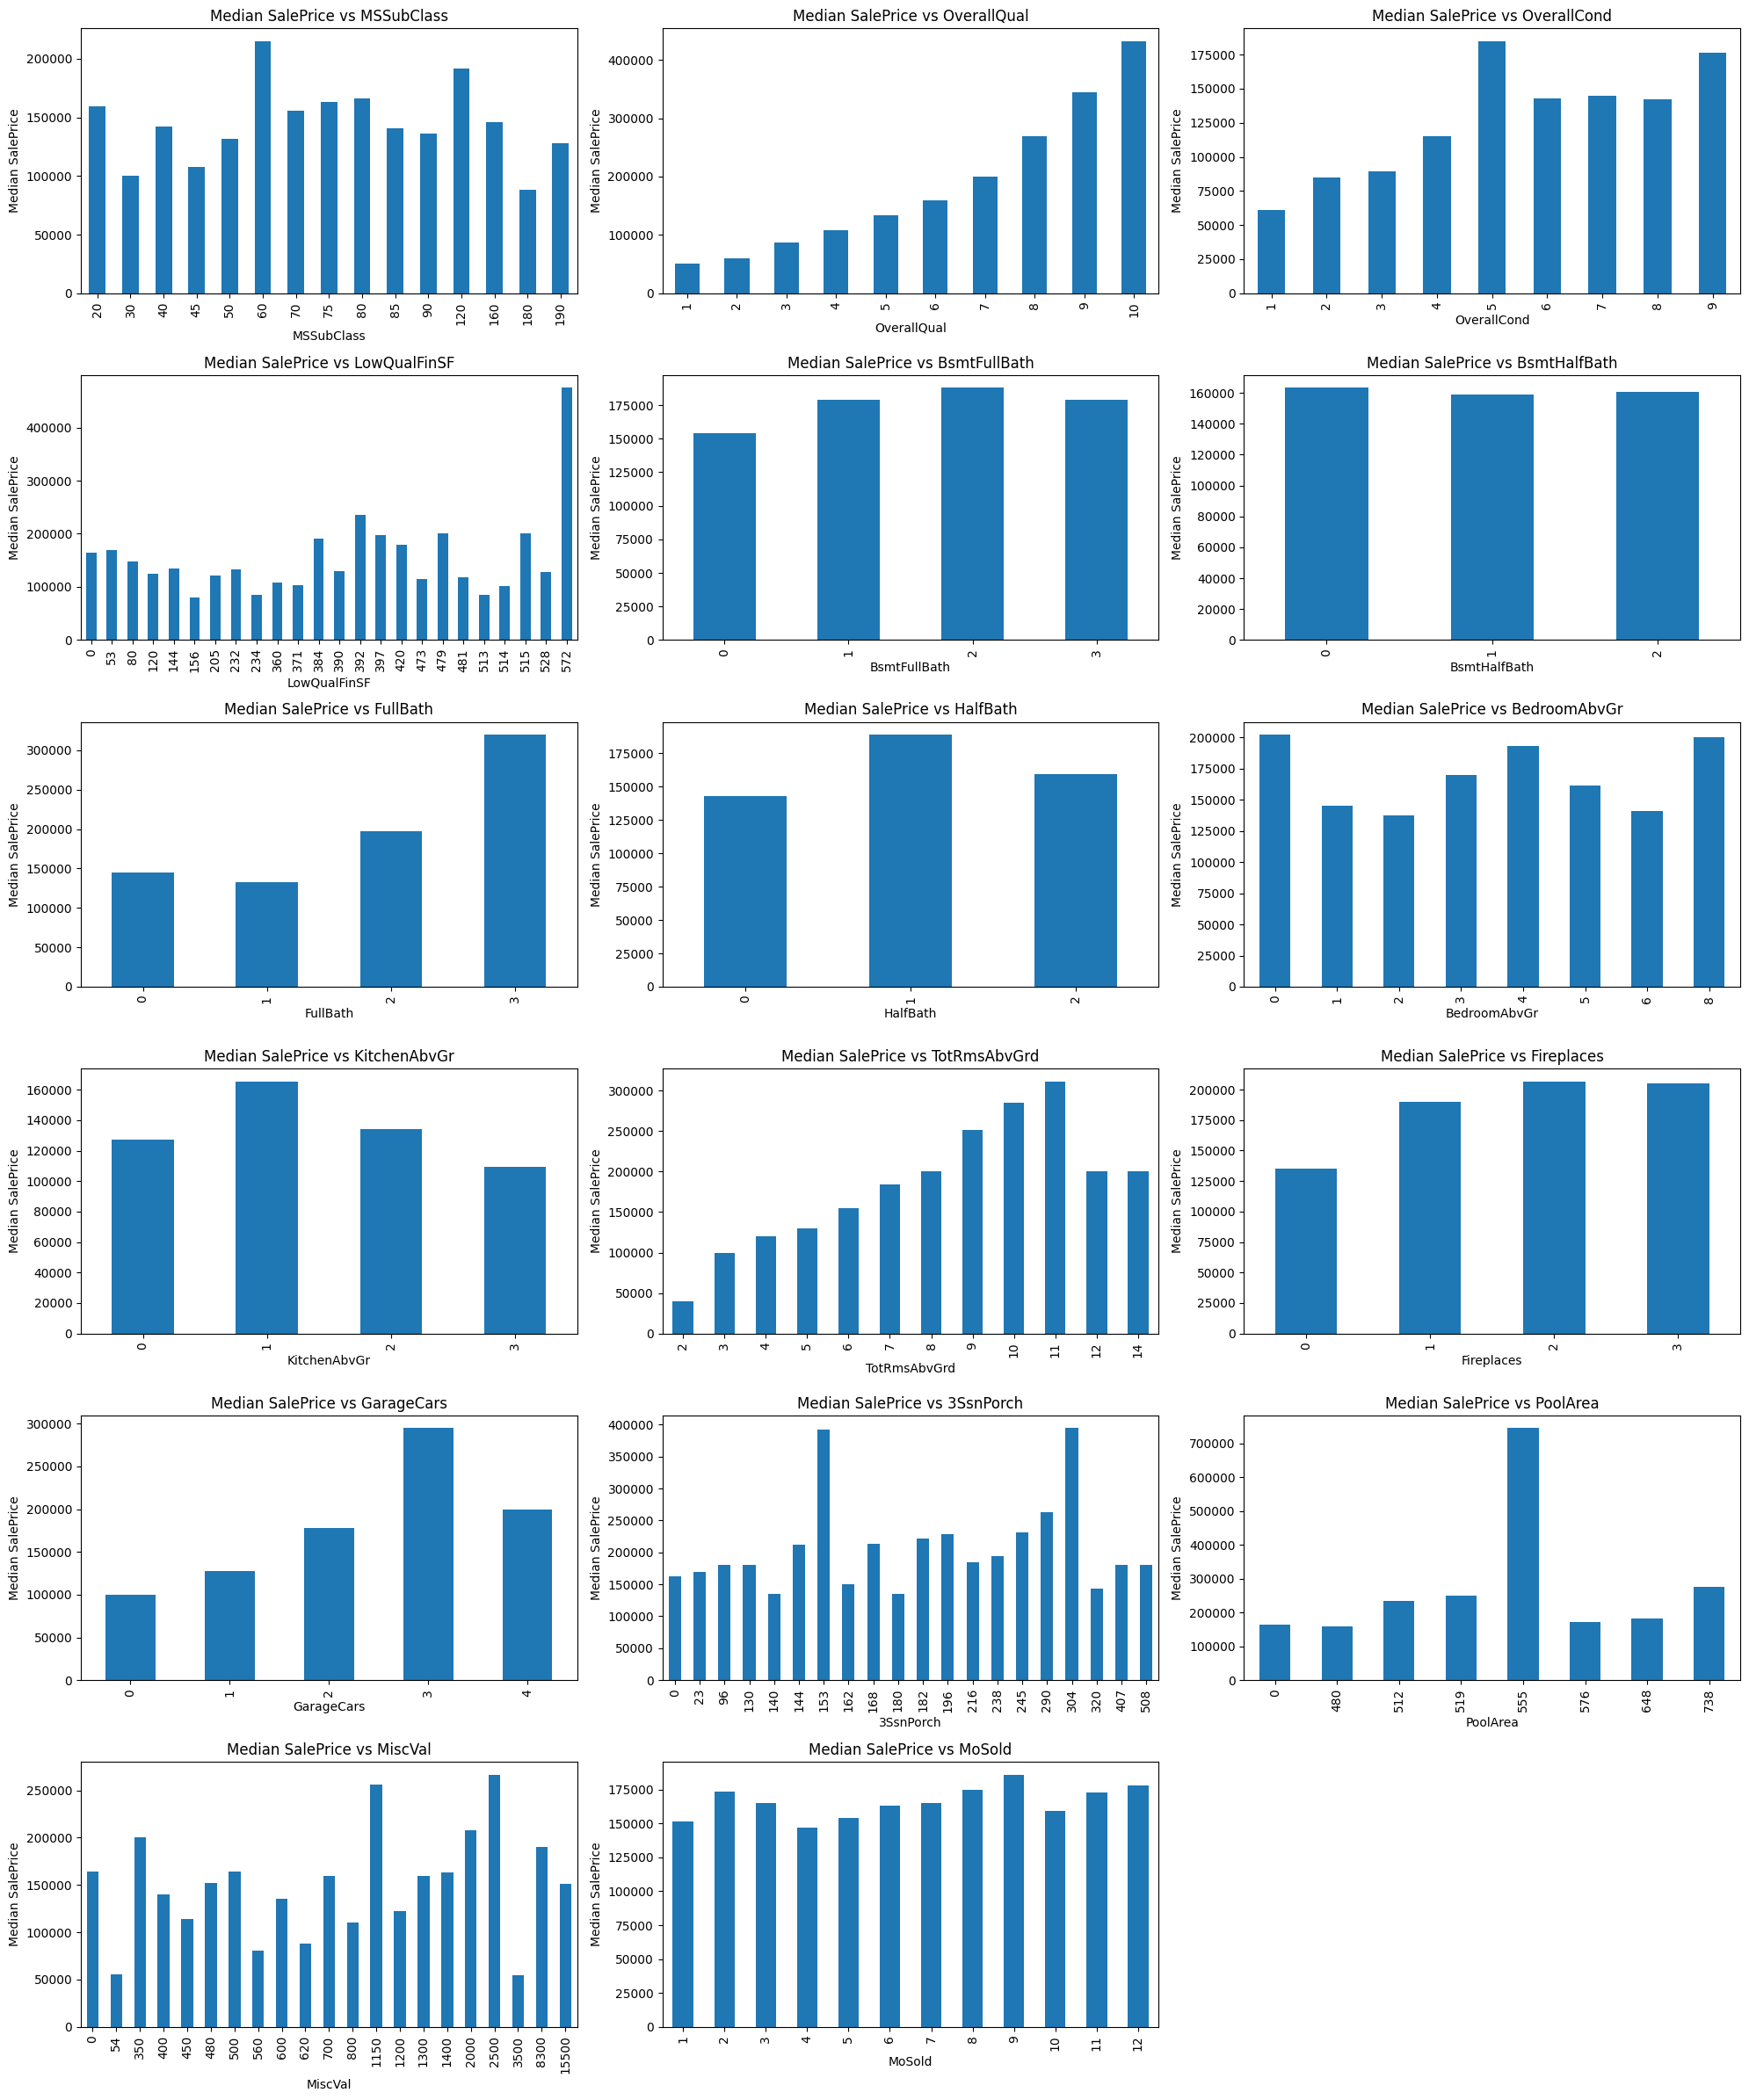

In [57]:
def discrete_plots(dataset):
    cols = 3
    rows = -(-len(discrete_vars) // cols)

    fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 4))
    ax = ax.flatten()
    
    for i, feature in enumerate(discrete_vars):
        dataset.groupby(feature)['SalePrice'].median().plot(kind='bar', ax=ax[i])
        ax[i].set_title(F"Median SalePrice vs {feature}")
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel("Median SalePrice")
    
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

discrete_plots(train_df)

#### **🧮 Continuous Variables**

In [61]:
continuous_vars = [ feature for feature in numerical_features if feature not in discrete_vars + year_vars+['Id'] ]
print(f"Continous variable count: {len(continuous_vars)}")
print(continuous_vars)

Continous variable count: 16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [69]:
train_df[continuous_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


- Check for skewness.

In [93]:
import pandas as pd

**Positive skew (> 0):** Right-skewed (longer tail on the right).  
**Negative skew (< 0):** Left-skewed (longer tail on the left).  
**Close to 0:** Nearly symmetric.  

In [101]:
skewcheck = train_df[continuous_vars].skew()
skewness_df = pd.DataFrame({
    'feature': skewcheck.index,
    'skewness': skewcheck.values
    })

skewness_df

,feature,skewness
0,LotFrontage,2.163569
1,LotArea,12.207688
2,MasVnrArea,2.669084
3,BsmtFinSF1,1.685503
4,BsmtFinSF2,4.255261
5,BsmtUnfSF,0.920268
6,TotalBsmtSF,1.524255
7,1stFlrSF,1.376757
8,2ndFlrSF,0.813030
9,GrLivArea,1.366560


- Analyze the distribution of each continuous feature.

In [83]:
import matplotlib.pyplot as plt

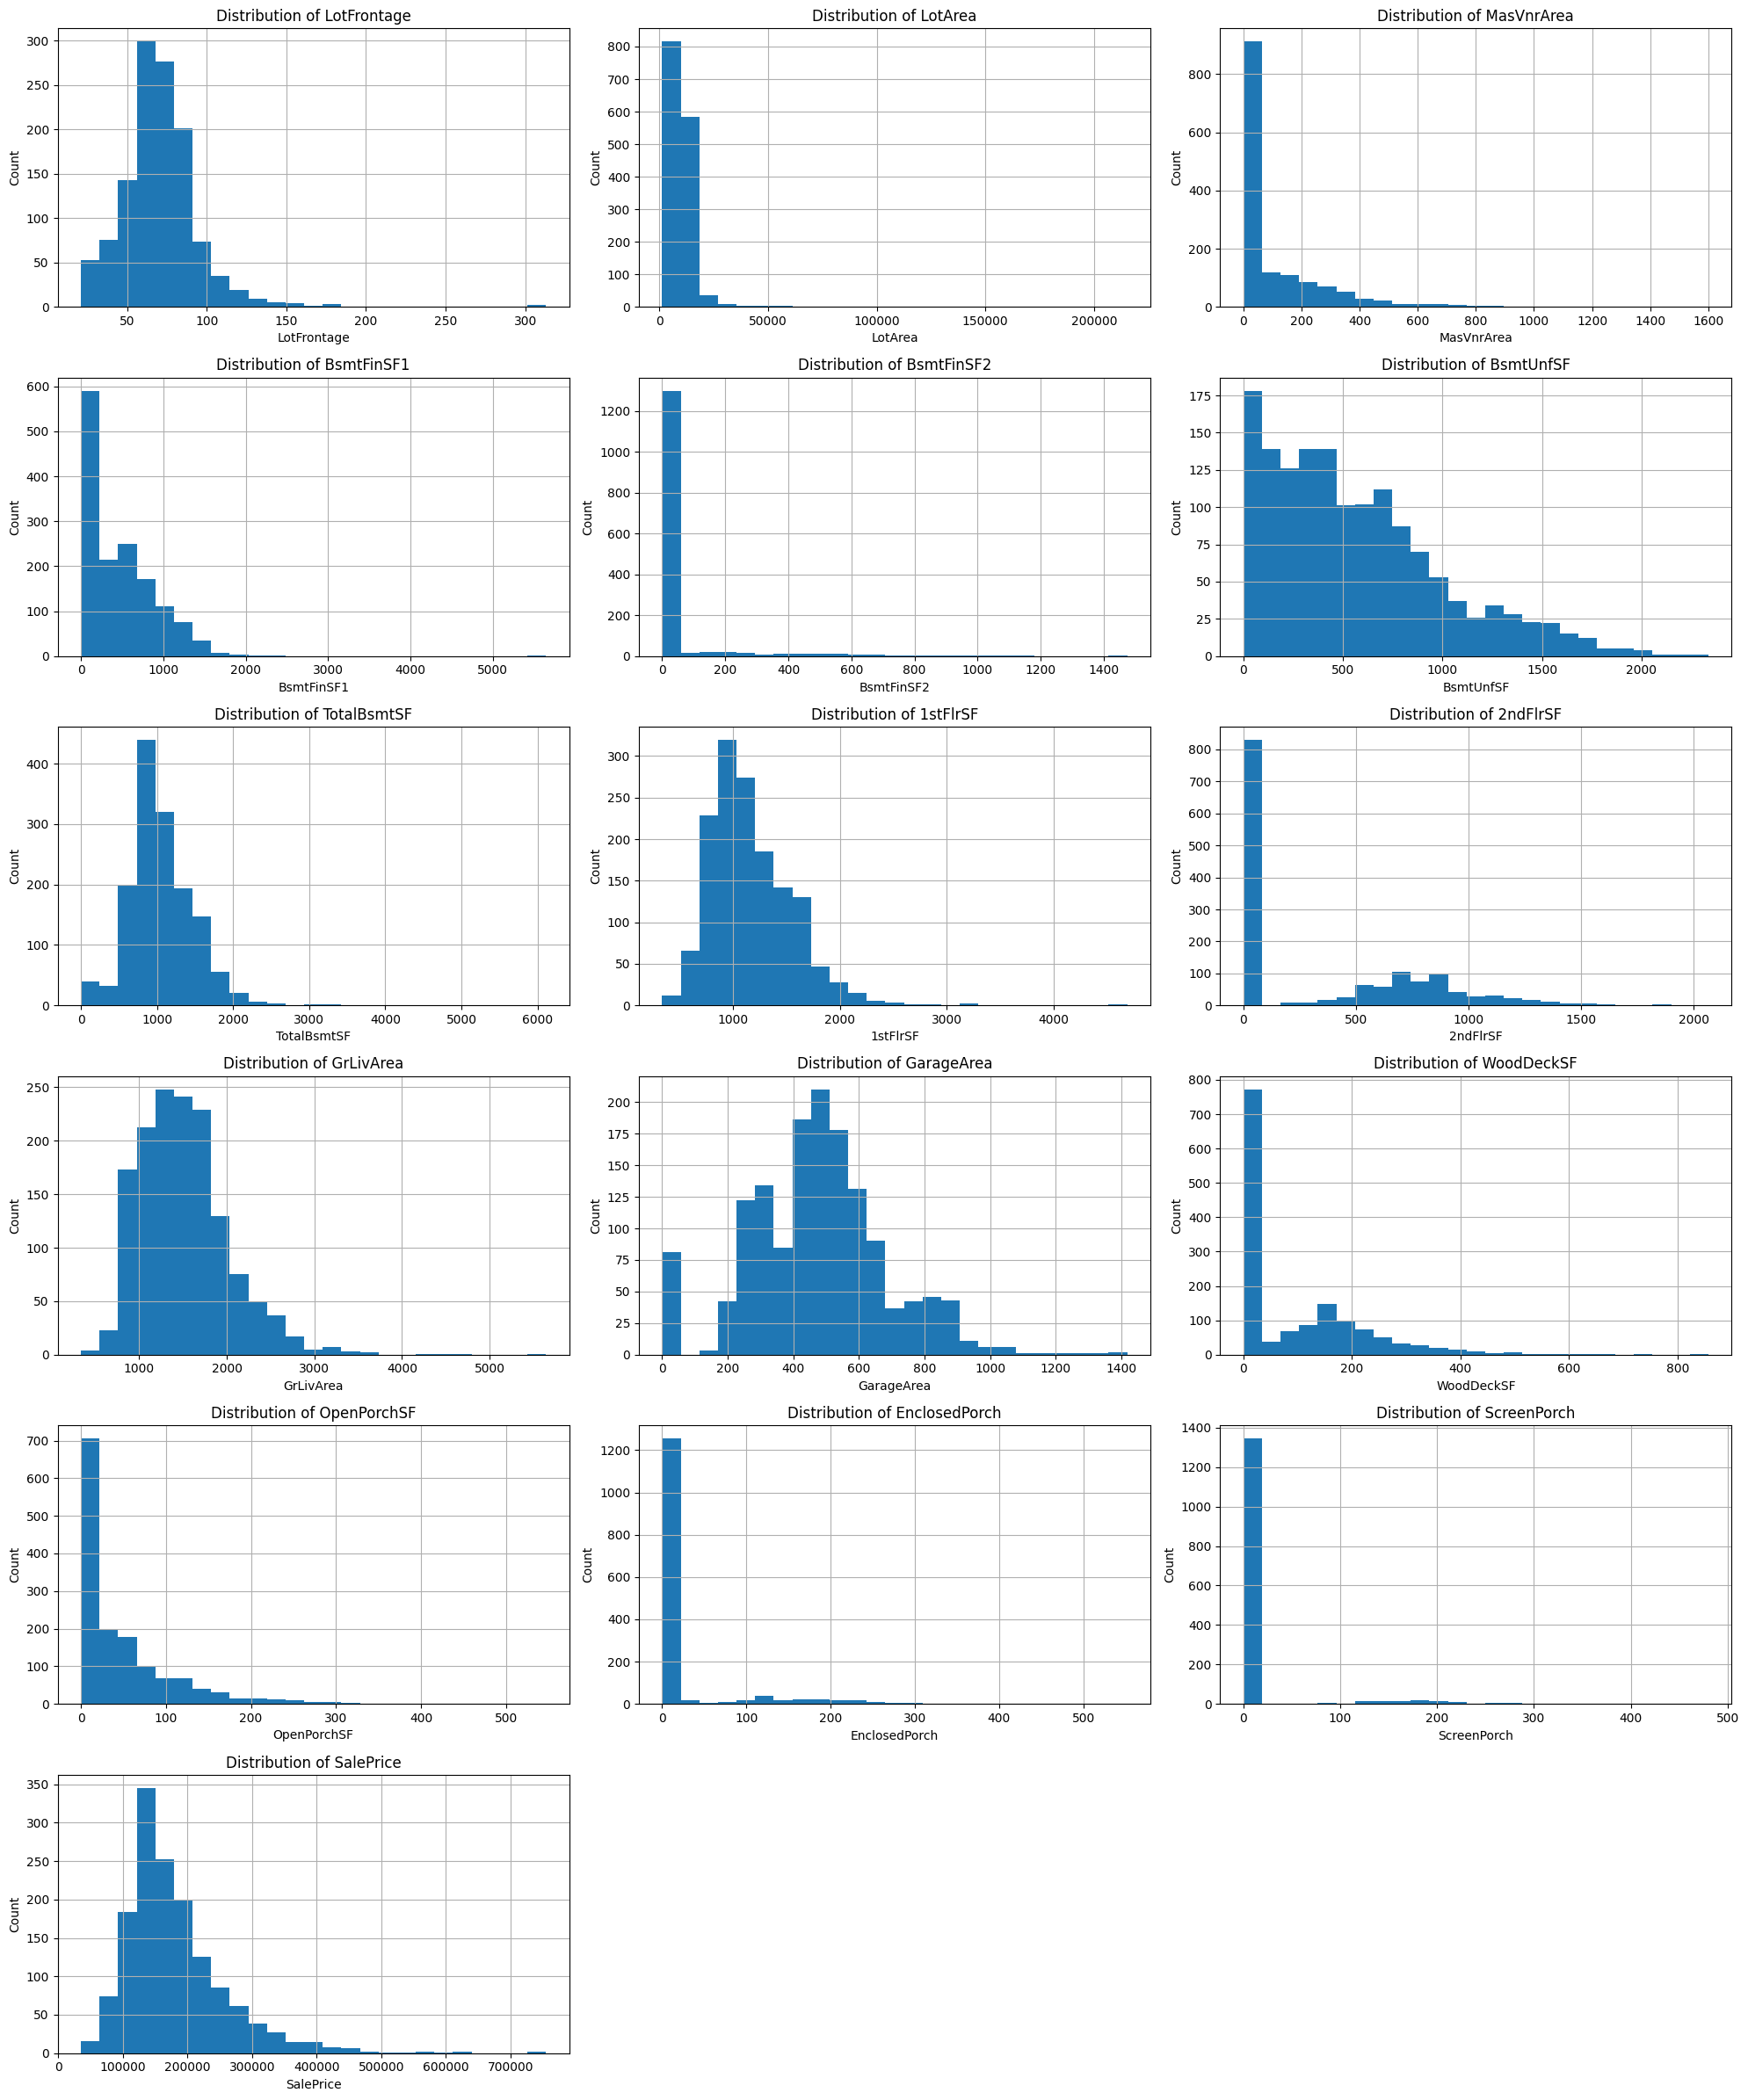

In [84]:
def histogram_cont(dataset):
    cols = 3
    rows = -(-len(continuous_vars) // cols)

    fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 4))
    ax = ax.flatten()
    
    for i, feature in enumerate(continuous_vars):
        dataset[feature].hist(bins=25, ax=ax[i])
        ax[i].set_title(f"Distribution of {feature}")
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel("Count")
        
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

histogram_cont(train_df)

In [ ]:
def histogram_cont(dataset):
    cols = 3
    rows = -(-len(continuous_vars) // cols)

    fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 4))
    ax = ax.flatten()
    
    for i, feature in enumerate(continuous_vars):
        dataset[feature].hist(bins=25, ax=ax[i])
        ax[i].set_title(f"Distribution of {feature}")
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel("Count")
        
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

histogram_cont(train_df)

- Check for outliers.

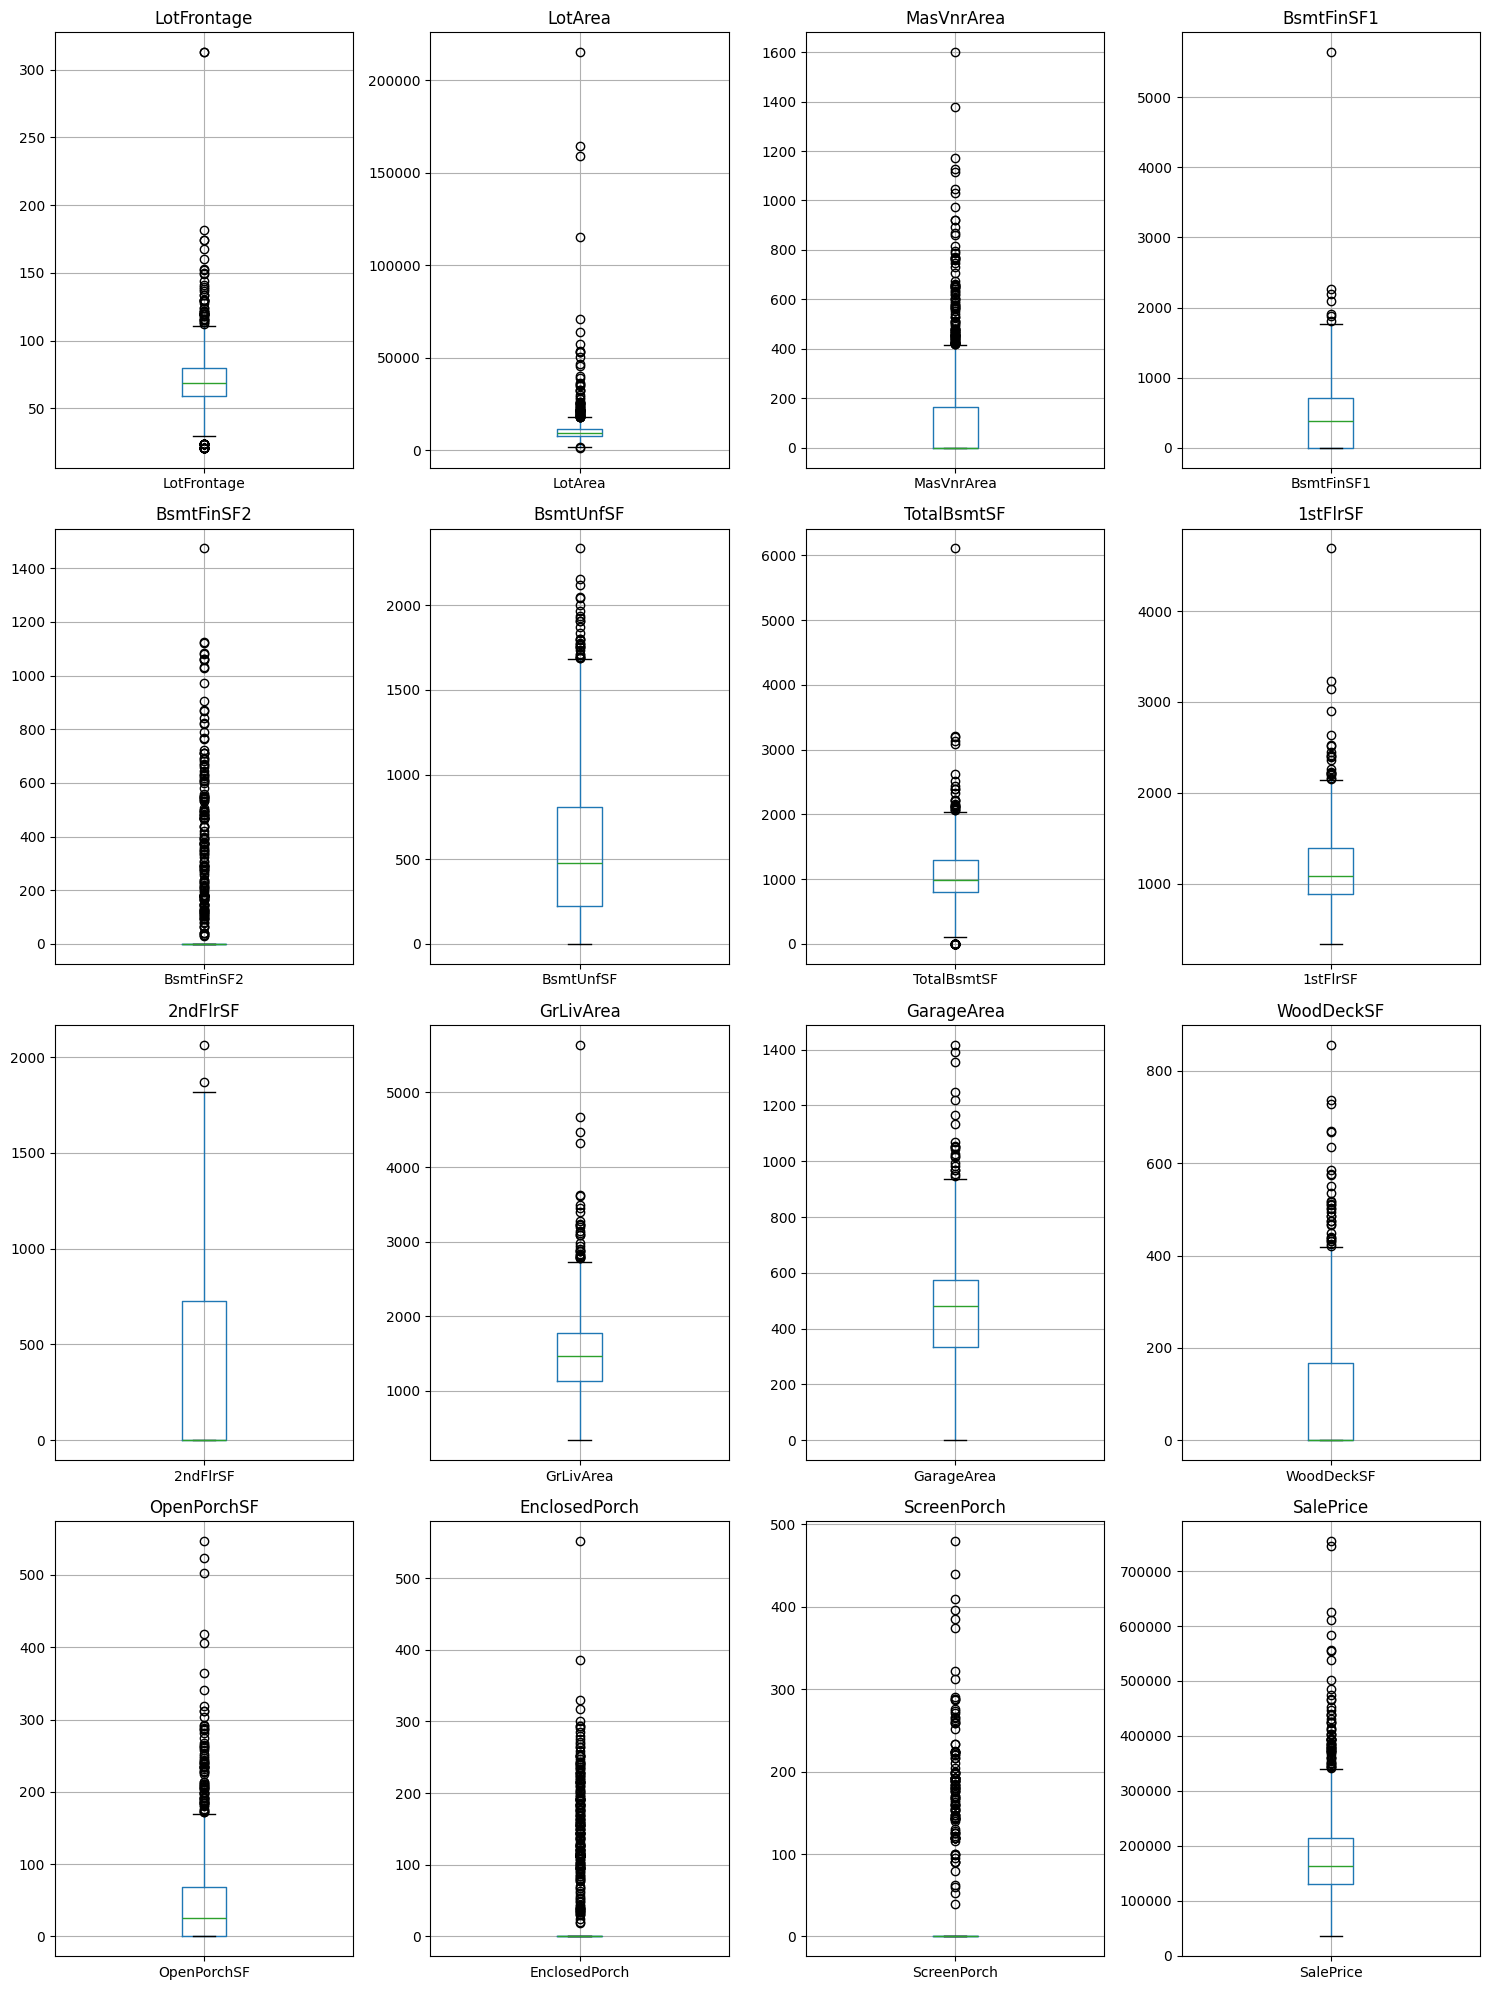

In [90]:
def boxplot_cont(dataset):
    cols = 4
    rows = -(-len(continuous_vars) // cols)

    fig, ax = plt.subplots(rows, cols, figsize=(15, rows * 5))
    ax = ax.flatten()
    
    for i, feature in enumerate(continuous_vars):
        dataset.boxplot(column=feature, ax=ax[i])
        ax[i].set_title(feature)
    
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)

    plt.tight_layout()
    plt.show()

boxplot_cont(train_df)

### **📚 Categorical Variables**

In [91]:
train_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
